#Load data



In [3]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/Rtfp/final_cleveland.csv")
X = df.drop("target", axis=1)
y = df["target"]

Mounted at /content/drive


#Test-Train Split

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.head())
print(X_test.head())


          age  sex   thalach  exang   oldpeak  slope  ca      chol  fbs  \
273 -1.720306  0.0  0.104820    0.0 -0.906712    2.0   0 -0.526877  0.0   
259  0.604120  0.0  0.934409    0.0 -0.133621    1.0   0 -0.141595  0.0   
30   1.600302  0.0  0.061157    0.0  0.639470    1.0   2 -0.160859  0.0   
22   0.382746  1.0  0.454120    0.0  0.639470    2.0   0  0.706027  0.0   
277 -0.834811  1.0  1.283709    0.0 -0.906712    1.0   0  0.108839  0.0   

     cp_1.0  cp_2.0  cp_3.0  cp_4.0  thal_3.0  thal_6.0  thal_7.0  
273   False   False    True   False      True     False     False  
259    True   False   False   False      True     False     False  
30     True   False   False   False      True     False     False  
22    False    True   False   False      True     False     False  
277   False   False    True   False      True     False     False  
          age  sex   thalach  exang   oldpeak  slope  ca      chol  fbs  \
167 -1.056185  0.0 -0.506457    0.0 -0.906712    2.0   0 -1.682724

#Load Models

In [11]:
import joblib
lr_model = joblib.load('/content/drive/My Drive/Rtfp/models/logistic_model.pkl')
rf_model = joblib.load('/content/drive/My Drive/Rtfp/models/random_forest_model.pkl')
ada_model = joblib.load('/content/drive/My Drive/Rtfp/models/ada_boosting_model.pkl')

#Stacking


Stacking Model (Meta: AdaBoost, Base: LR, RF, AdaBoost)
Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        36
           1       0.92      0.92      0.92        24

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60


Confusion Matrix:
 [[34  2]
 [ 2 22]]


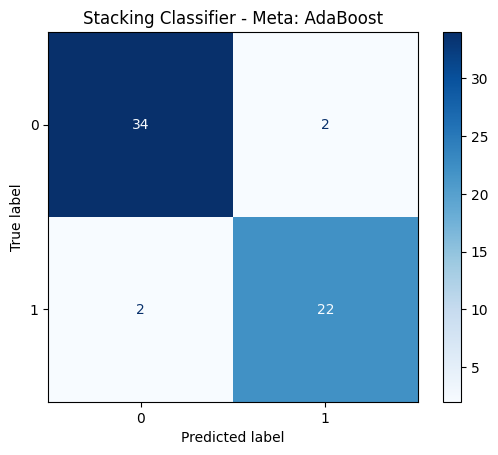

In [13]:
from sklearn.ensemble import StackingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

lr_model = LogisticRegression()
rf_model = RandomForestClassifier()
ada_model = AdaBoostClassifier()

estimators = [
    ('lr', lr_model),
    ('rf', rf_model),
    ('ada', ada_model)
]

meta_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=meta_model,
    passthrough=False,
    cv=10
)

stacking_model.fit(X_train, y_train)

y_pred_stack = stacking_model.predict(X_test)

print("\nStacking Model (Meta: AdaBoost, Base: LR, RF, AdaBoost)")
print("Accuracy:", accuracy_score(y_test, y_pred_stack))
print("\nClassification Report:\n", classification_report(y_test, y_pred_stack))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_stack))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_stack, cmap=plt.cm.Blues, values_format='d')
plt.title("Stacking Classifier - Meta: AdaBoost")
plt.grid(False)
plt.show()


In [ ]:
import joblib
joblib.dump(stacking_model, '/content/drive/My Drive/Rtfp/models/stacked_model.pkl')


['/content/drive/My Drive/Rtfp/models/stacked_model.pkl']